# Introduction

We have to create a model trained on measurements of health characteristics to predict if the person has one or more of any of the three medical conditions (Class 1), or none of the three medical conditions (Class 0).

This time, however, I would like to **analyze these health characteristics from another aspect: clinical treatment using an AI model with the health characteristics**, which may be a bit different from the original purpose of this competition.

**Although it is important to predict medical conditions, it is also indispensable to consider whether the medical conditions can be prevented or improved with the use of AI.**

Generally, feature selection is often indispensable for healthcare practice. **First, medical tests with lots of health features are often expensive, thus ineffective from the point of health economics.** Comprehensive medical examinations are not always available to everyone. **Secondly, healthcare professionals have to focus on the greatest risk factor(s) for the treatment of the disease.** It is impractical to address every health characteristic to prevent or treat a disease.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV Files

In [2]:
# Load the data.
train_df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')
test_df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')
greeks_df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/greeks.csv')
sample_submission_df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv')

In [3]:
train_df

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,...,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,0
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,...,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,0
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,...,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,0
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,...,9.256996,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622,0


It appears to be a tabular dataset with 617 rows and 58 columns. Each row represents a sample, and the columns represent different features or attributes of the samples.

In [4]:
train_df.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

Columns 0 to 57: They contain various numeric features represented as float64 data type.

Column 58: It contains the target variable, represented as an int64 data type.

Columns "Id" (column 0) and "EJ" (column 40): They are object data types, which might contain string or categorical values. **Maybe "EJ" means "female or male."**

In [6]:
# It maps the value 'A' to 0 and the value 'B' to 1 using the replace() function. 
train_df['EJ'] = train_df['EJ'].replace({'A': 0, 'B': 1})

The columns with missing values include "BQ," "CB," "CC," "DU," "EL," "FL," "FS," and "GL."

In [7]:
# Replace missing values with the most recent non-null value in the column.
train_df = train_df.fillna(method = 'ffill')

In [8]:
test_df

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The Data Frame 'test_df' contains 5 rows and 57 columns. Each row represents a sample, and each column represents a feature.

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      5 non-null      object 
 1   AB      5 non-null      float64
 2   AF      5 non-null      float64
 3   AH      5 non-null      float64
 4   AM      5 non-null      float64
 5   AR      5 non-null      float64
 6   AX      5 non-null      float64
 7   AY      5 non-null      float64
 8   AZ      5 non-null      float64
 9   BC      5 non-null      float64
 10  BD      5 non-null      float64
 11  BN      5 non-null      float64
 12  BP      5 non-null      float64
 13  BQ      5 non-null      float64
 14  BR      5 non-null      float64
 15  BZ      5 non-null      float64
 16  CB      5 non-null      float64
 17  CC      5 non-null      float64
 18  CD      5 non-null      float64
 19  CF      5 non-null      float64
 20  CH      5 non-null      float64
 21  CL      5 non-null      float64
 22  CR    

The Data Frame 'test_df' has 5 entries (rows) and 57 columns. The data types of the columns are as follows:

    'Id': object
    'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', ...: float64
    'FI', 'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL': float64

All columns have non-null values, and the memory usage of the Data Frame is approximately 2.4 KB.

In [10]:
# It maps the value 'A' to 0 and the value 'B' to 1 using the replace() function.
test_df['EJ'] = test_df['EJ'].replace({'A': 0, 'B': 1})

Although non-null values are not observed in these test data, **there may be non-null values in the hidden test data**. Thus, we must replace these values with something in advance.

In [11]:
# Replace missing values with the most recent non-null value in the column.
test_df = test_df.fillna(method = 'ffill')

In [12]:
greeks_df

,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020
...,...,...,...,...,...,...
612,fd3dafe738fd,A,B,M,B,9/13/2020
613,fd895603f071,A,B,M,B,9/8/2020
614,fd8ef6377f76,A,C,M,B,7/24/2019
615,fe1942975e40,A,C,M,B,1/31/2019


Alpha Identifies the type of age-related condition, if present.
    A No age-related condition. Corresponds to class 0.
    B, D, G The three age-related conditions. Correspond to class 1.

Beta, Gamma, Delta Three experimental characteristics.

Epsilon The date the data for this subject was collected. Note that all of the data in the test set was collected after the training set was collected.

**For example, we can suppose "class 1" as myocardial infarction, and  "B", "D", and "G" as hypertension, diabetes, and high cholesterol, respectively. The health characteristics can be various genetic or environmental factors, such as sex (maybe "EJ"), smoking, salt intake, and mental stress.**

In [13]:
from datetime import date, datetime
times = greeks_df.Epsilon.copy()
times[greeks_df.Epsilon != 'Unknown'] = greeks_df.Epsilon[greeks_df.Epsilon != 'Unknown'].map(lambda x: datetime.strptime(x,'%m/%d/%Y').toordinal())
times[greeks_df.Epsilon == 'Unknown'] = np.nan

In [14]:
times

0      737137.0
1           NaN
2           NaN
3           NaN
4      737509.0
         ...   
612    737681.0
613    737676.0
614    737264.0
615    737090.0
616         NaN
Name: Epsilon, Length: 617, dtype: object

The 'Epsilon' column in the 'train_df' Data Frame is updated with the values from the times variable. Then, the Data Frame columns are rearranged to move the 'Epsilon' column to the second-to-last position, just before the 'Class' column.

In [15]:
train_df['Epsilon'] = times
train_df

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FR,FS,GB,GE,GF,GH,GI,GL,Class,Epsilon
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1,737137.0
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0,NaN
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0,NaN
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0,NaN
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1,737509.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,...,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,0,737681.0
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,...,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,0,737676.0
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,...,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,0,737264.0
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,...,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622,0,737090.0


In [16]:
class_col = train_df.pop('Class')
train_df['Class'] = class_col
train_df

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FR,FS,GB,GE,GF,GH,GI,GL,Epsilon,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,737137.0,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,NaN,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,NaN,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,NaN,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,737509.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,...,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,737681.0,0
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,...,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,737676.0,0
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,...,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,737264.0,0
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,...,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622,737090.0,0


Note that **all of the data in the test set was collected after the training set was collected**. Thus, **Epsilon in test_df must be larger than the maximum of Epsilon in train_df**.

In [17]:
test_df['Epsilon'] = max(times) + 1
test_df

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Epsilon
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737698.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737698.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737698.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737698.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737698.0


# Create Dataset without Features Selection

At first, we try to **create, train, and evaluate a model with all the features as independent variables**.

In [18]:
# X represents the feature data, and y represents the target variable data.
X = train_df.iloc[:, 1:-1]
y = train_df.iloc[:, -1]

In [19]:
# We can split the data into training and testing sets using the train_test_split function from scikit-learn.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
from sklearn.preprocessing import StandardScaler

# Standardize the independent variables.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create, Train, and Evaluate Model without Features Selection

In [21]:
from xgboost import XGBClassifier

# Create the XGBClassifier model.
model = XGBClassifier()

# Train the model on the training data.
model.fit(X_train, y_train)

# Evaluate the model on the test data.
print('Accuracy:', model.score(X_test, y_test))

Accuracy: 0.9516129032258065


In [22]:
from sklearn.metrics import classification_report, confusion_matrix

# Get the predictions using the model on the test data.
y_pred = model.predict(X_test)

# Create a classification report for the model.
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Create a confusion matrix for the model.
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       101
           1       1.00      0.74      0.85        23

    accuracy                           0.95       124
   macro avg       0.97      0.87      0.91       124
weighted avg       0.95      0.95      0.95       124

Confusion Matrix:
[[101   0]
 [  6  17]]


Text(50.722222222222214, 0.5, 'Truth')

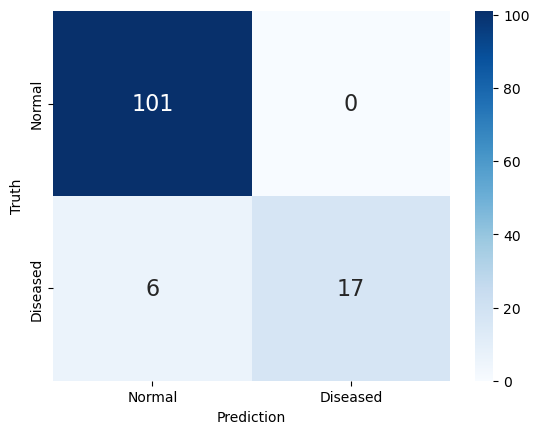

In [23]:
cm = confusion_matrix(y_test, y_pred)

# Define the class names.
class_names = ['Normal', 'Diseased']

# Create the heatmap with class names as tick labels.
ax = sns.heatmap(cm, annot = True, fmt = '.0f', cmap = "Blues", annot_kws = {"size": 16},\
           xticklabels = class_names, yticklabels = class_names)

# Set the axis labels.
ax.set_xlabel("Prediction")
ax.set_ylabel("Truth")

The model achieved an accuracy of 95% on the test set, with high precision, recall, and F1-scores for class 0. However, the model had a lower recall for class 1, indicating that it may have difficulty correctly identifying instances of class 1 compared to class 0.

# Select Features for Medical Prognosis

**More often than not, health characteristics must be selected for medical examinations to save healthcare resources.**

There are several techniques we can use to select features from a large number of independent variables:

   1. **Univariate Feature Selection**: This method selects the features with **the highest correlation with the target variable** using statistical tests like chi-squared test, ANOVA F-test, mutual information, etc.

   2. **Recursive Feature Elimination**: This method **recursively removes features from the dataset and selects the features that contribute the most to the model's accuracy**.

   3. **Tree-Based Methods**: Tree-based models **like Random Forest and XGBoost** can be used to **rank the importance of the features** based on their contribution to the model's accuracy.

We can also **combine multiple feature selection techniques** to get a more accurate and robust feature set.

# Create Dataset with Univariate Feature Selection

To perform Univariate Feature Selection, we can use **the SelectKBest class from the scikit-learn library**. we are using **the F-test score (f_regression)** as the scoring function **to rank the features**. We are **selecting the top 10 features** based on this score (k=10). Once we fit the selector on the independent variables and target variable, we can get the indices and names of the selected features using the get_support and columns methods, respectively.

In [24]:
# X represents the feature data, and y represents the target variable data.
X = train_df.iloc[:, 1:-1]
y = train_df.iloc[:, -1]

In [25]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select the top 10 features based on the F-test score.
selector = SelectKBest(score_func = f_regression, k = 10)

# Fit the selector on the independent variables and target variable.
X.fillna(method = 'ffill', inplace = True)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features.
selected_indices = selector.get_support(indices = True)

# Get the names of the selected features.
selected_X = X.columns[selected_indices]

In [26]:
# the selected features
X_new

array([[2.09377000e-01, 3.10903329e+03, 2.23944070e+01, ...,
        5.31069000e+00, 9.02829192e+03, 7.29816194e+00],
       [1.45282000e-01, 9.78764160e+02, 3.69688890e+01, ...,
        5.51760000e-03, 6.78500347e+03, 1.73229000e-01],
       [4.70030000e-01, 2.63510654e+03, 3.23605530e+01, ...,
        1.28973900e+00, 8.33890618e+03, 7.70956011e+00],
       ...,
       [4.27300000e-01, 2.45910720e+03, 5.53557780e+01, ...,
        5.51760000e-03, 5.08892291e+03, 1.73229000e-01],
       [3.63205000e-01, 1.26353524e+03, 2.36858560e+01, ...,
        5.10378000e-01, 6.46425083e+03, 9.25699588e+00],
       [4.82849000e-01, 2.67253426e+03, 1.12006102e+02, ...,
        5.51760000e-03, 5.89535226e+03, 1.73229000e-01]])

In [27]:
# the selected features
selected_X

Index(['AB', 'AF', 'AM', 'BQ', 'CR', 'DH', 'DI', 'DU', 'FE', 'FL'], dtype='object')

In [28]:
# the selected features
selected_X.values

array(['AB', 'AF', 'AM', 'BQ', 'CR', 'DH', 'DI', 'DU', 'FE', 'FL'],
      dtype=object)

In [29]:
# We can split the data into training and testing sets using the train_test_split function from scikit-learn.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)

In [30]:
from sklearn.preprocessing import StandardScaler

# Standardize the independent variables.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create, Train, and Evaluate Model with Univariate Feature Selection

In [31]:
from xgboost import XGBClassifier

# Create the XGBClassifier model.
model = XGBClassifier()

# Train the model on the training data.
model.fit(X_train, y_train)

# Evaluate the model on the test data.
print('Accuracy:', model.score(X_test, y_test))

Accuracy: 0.9516129032258065


In [32]:
from sklearn.metrics import classification_report, confusion_matrix

# Get the predictions using the model on the test data.
y_pred = model.predict(X_test)

# Create a classification report for the model.
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Create a confusion matrix for the model.
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       101
           1       0.90      0.83      0.86        23

    accuracy                           0.95       124
   macro avg       0.93      0.90      0.92       124
weighted avg       0.95      0.95      0.95       124

Confusion Matrix:
[[99  2]
 [ 4 19]]


The model achieved an accuracy of 95% on the test set, with good precision, recall, and F1-scores for both classes. However, the model had slightly lower recall for class 1 compared to class 0. Overall, the model shows promising results with good balance between precision and recall for both classes.

Text(50.722222222222214, 0.5, 'Truth')

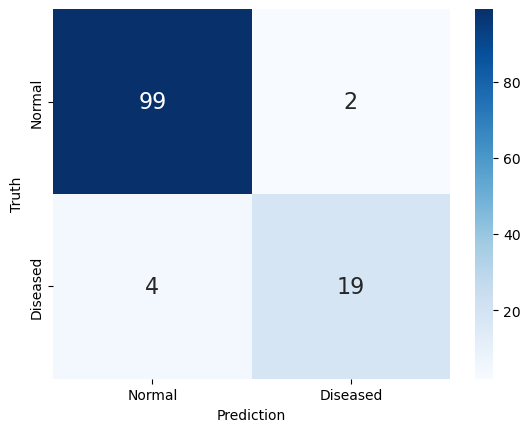

In [33]:
cm = confusion_matrix(y_test, y_pred)

# Define the class names.
class_names = ['Normal', 'Diseased']

# Create the heatmap with class names as tick labels.
ax = sns.heatmap(cm, annot = True, fmt = '.0f', cmap = "Blues", annot_kws = {"size": 16},\
           xticklabels = class_names, yticklabels = class_names)

# Set the axis labels.
ax.set_xlabel("Prediction")
ax.set_ylabel("Truth")

# Create, Train, and Evaluate Model with Recursive Feature Elimination (RFE)

Recursive Feature Elimination (RFE) is a method to **select the best features by recursively considering smaller and smaller subsets of features**. In each iteration, the model is trained on the remaining features and the feature **with the lowest importance is removed**.

To add RFE to the model, we can use **the RFE class from scikit-learn**.

Here, **n_features_to_select is the number of features to select** and **step is the number of features to remove at each iteration**. The selector.transform method selects only the selected features from the training and testing data, and the model is fit on the selected features. Finally, the performance of the model is evaluated on the selected features.

In [34]:
# X represents the feature data, and y represents the target variable data.
X = train_df.iloc[:, 1:-1]
y = train_df.iloc[:, -1]

In [35]:
# We can split the data into training and testing sets using the train_test_split function from scikit-learn.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
from sklearn.preprocessing import StandardScaler

# Standardize the independent variables.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

# Create the XGBClassifier model.
model = XGBClassifier()

# Create an instance of the RFE class and set the number of features to select.
selector = RFE(model, n_features_to_select = 10, step = 1)

# Fit the selector on the training data.
selector.fit(X_train, y_train)

# Transform the training and testing data to include only the selected features.
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Fit the linear regression model on the selected features.
model.fit(X_train_selected, y_train)

# Evaluate the model on the test data.
print('Accuracy:', model.score(X_test_selected, y_test))

Accuracy: 0.9516129032258065


In [38]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict the values of the dependent variable (target) on the testing set using the selected features.
y_pred = model.predict(X_test_selected)

# Create a classification report for the model.
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Create a confusion matrix for the model.
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       101
           1       0.95      0.78      0.86        23

    accuracy                           0.95       124
   macro avg       0.95      0.89      0.91       124
weighted avg       0.95      0.95      0.95       124

Confusion Matrix:
[[100   1]
 [  5  18]]


The model achieved an accuracy of 95% on the test set, with high precision, recall, and F1-scores for both class 0 and class 1. The model performed well in identifying instances of class 0, while the recall for class 1 was slightly lower.

Text(50.722222222222214, 0.5, 'Truth')

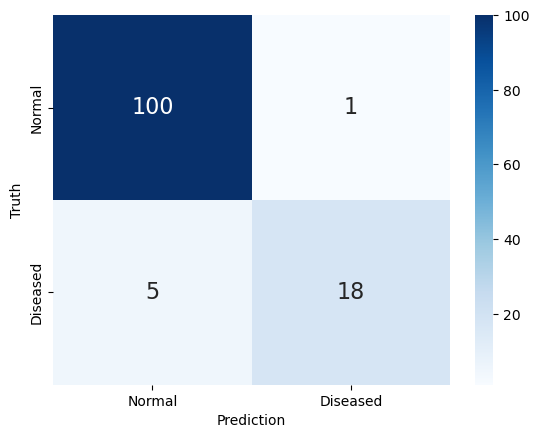

In [39]:
cm = confusion_matrix(y_test, y_pred)

# Define the class names.
class_names = ['Normal', 'Diseased']

# Create the heatmap with class names as tick labels.
ax = sns.heatmap(cm, annot = True, fmt = '.0f', cmap = "Blues", annot_kws = {"size": 16},\
           xticklabels = class_names, yticklabels = class_names)

# Set the axis labels.
ax.set_xlabel("Prediction")
ax.set_ylabel("Truth")

# Select Features for Medical Treatment

After a patient's health risk for the disease is predicted by AI, the patient and the healthcare professionals will be concerned about **whether the disease can be effectively prevented or treated**. Thus, the likelihood of the prevention or treatment should also be predicted by the AI.

Generally, it is extremely impractical for both healthcare professionals and patients to address every health characteristic to prevent or treat a disease. Thus, it is important to **select the greatest risk factor(s) for the disease that can be improved by current medical technology**.

In [40]:
# X represents the feature data, and y represents the target variable data.
X = train_df.iloc[:, 1:-1]
y = train_df.iloc[:, -1]

# We can split the data into training and testing sets using the train_test_split function from scikit-learn.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.preprocessing import StandardScaler

# Standardize the independent variables.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from xgboost import XGBClassifier

# Create the XGBClassifier model.
model = XGBClassifier()

# Train the model on the training data.
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

**We detect important features.**

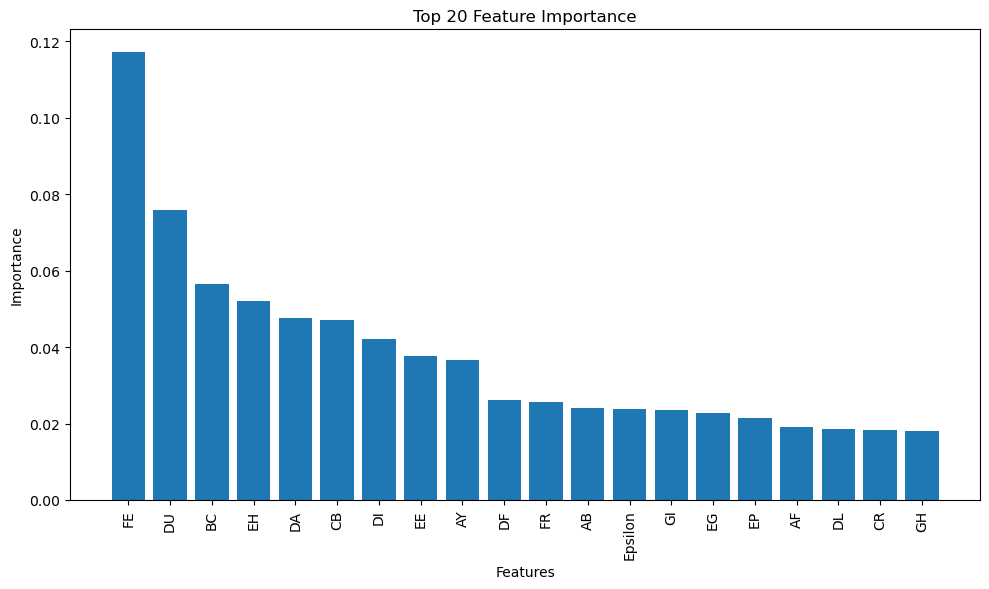

In [41]:
# Get the feature importances.
importances = model.feature_importances_

# Get the indices of the top 20 features.
top_indices = importances.argsort()[::-1][:20]

# Get the names of the top 20 features.
top_feature_names = X.columns[top_indices]

# Get the importances of the top 20 features.
top_importances = importances[top_indices]

# Plot the feature importances for the top 20 features.
plt.figure(figsize = (10, 6))
plt.bar(range(len(top_feature_names)), top_importances)
plt.xticks(range(len(top_feature_names)), top_feature_names, rotation = 90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 20 Feature Importance')
plt.tight_layout()
plt.show()

# Treatment of the Top Feature

We do not know what health characteristics these independent variables are. **If they are genetic factors, they are difficult to treat.** For example, maybe "EJ" means "female or male." It is generally impossible for patients to change their genetic factors. **On the other hand, environmental factors are possible to improve by changing their lifestyle.**

**We show the top feature.**

In [42]:
# Get the index of the top feature.
top_index = importances.argmax()

# Get the name and importance of the top feature.
top_feature_name = X.columns[top_index]
top_importance = importances[top_index]

# Print the importance and top feature importance.
print('Importance:', top_feature_name)
print('Top Feature Importance:', top_importance)

Importance: FE
Top Feature Importance: 0.11727511


**We compare the mean value between "Class 0" and "Class 1."**

In [43]:
# Calculate the mean value of the top feature for each class.
class_mean1 = train_df.groupby('Class')[top_feature_name].mean()

# Print the mean values.
print("Mean value of {} for Class 0: {}".format(top_feature_name, class_mean1[0]))
print("Mean value of {} for Class 1: {}".format(top_feature_name, class_mean1[1]))

Mean value of FE for Class 0: 9178.430431170924
Mean value of FE for Class 1: 15624.825328916668


**We compare the median value  between "Class 0" and "Class 1." It may be better because of outliers.**

In [44]:
# Calculate the median value of the top feature for each class.
class_median1 = train_df.groupby('Class')[top_feature_name].median()

# Print the median values.
print("Median value of {} for Class 0: {}".format(top_feature_name, class_median1[0]))
print("Median value of {} for Class 1: {}".format(top_feature_name, class_median1[1]))

Median value of FE for Class 0: 7075.872004
Median value of FE for Class 1: 8584.1306975


**We visualize the difference.**

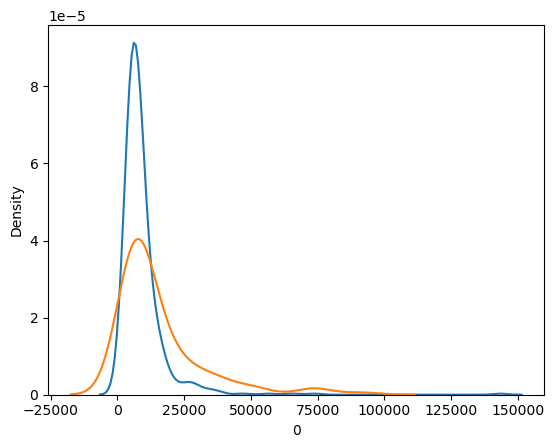

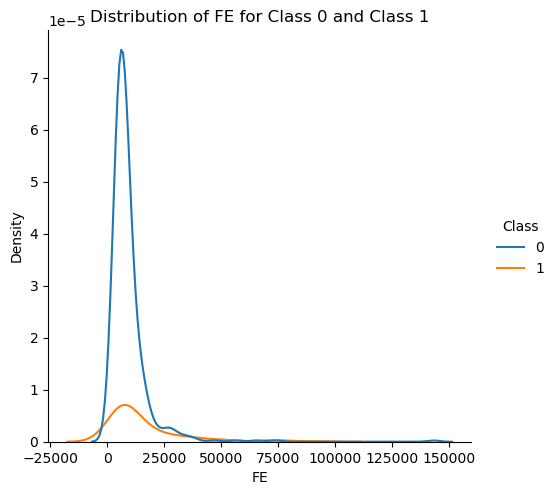

In [45]:
# Group the data by the "Class" column and calculate the distribution of the top feature.
feature_distribution = train_df.groupby('Class')[top_feature_name].apply(lambda x: sns.kdeplot(x))

# Plot the distribution.
sns.displot(data = train_df, x = top_feature_name, hue = 'Class', kind = 'kde')
plt.title('Distribution of {} for Class 0 and Class 1'.format(top_feature_name))
plt.show()

Here, we **suppose that the top feature can be improved to the median value among healthy people in the training data by some intervention**. Then we look into **how the disease risk will change by using the trained model**. 

In [46]:
train_df_T1 = train_df.copy()

# Reduce the value of top_feature_name to class_median1[0] if it is more than class_median1[0].
train_df_T1[top_feature_name] = train_df_T1[top_feature_name].apply(lambda x: min(x, class_median1[0]))
print(train_df_T1[top_feature_name])
train_df_T1

0      7075.872004
1      6785.003474
2      7075.872004
3      7075.872004
4      7075.872004
          ...     
612    7075.872004
613    7075.872004
614    5088.922912
615    6464.250832
616    5895.352262
Name: FE, Length: 617, dtype: float64


,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FR,FS,GB,GE,GF,GH,GI,GL,Epsilon,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,737137.0,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,NaN,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,NaN,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,NaN,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,737509.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,...,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,737681.0,0
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,...,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,737676.0,0
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,...,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,737264.0,0
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,...,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622,737090.0,0


In [47]:
# X_T1 represents the feature data, and y represents the target variable data.
X_T1 = train_df_T1.iloc[:, 1:-1]
y = train_df_T1.iloc[:, -1]

# We can split the data into training and testing sets using the train_test_split function from scikit-learn.
from sklearn.model_selection import train_test_split

X_train_T1, X_test_T1, y_train, y_test = train_test_split(X_T1, y, test_size = 0.2, random_state = 42)

# Standardize the independent variables.
X_train_T1 = scaler.transform(X_train_T1)
X_test_T1 = scaler.transform(X_test_T1)

In [48]:
# probability of the disease
selected_probs = model.predict_proba(X_test)[:, 1][y_test == 1]
selected_probs

array([0.9890322 , 0.9522492 , 0.76040083, 0.9479036 , 0.804129  ,
       0.25214103, 0.23671035, 0.64574146, 0.01388482, 0.9990664 ,
       0.9637296 , 0.9854983 , 0.9065042 , 0.15588093, 0.52860343,
       0.9512857 , 0.8958291 , 0.9806491 , 0.9974631 , 0.7083695 ,
       0.21048228, 0.9158255 , 0.32509154], dtype=float32)

In [49]:
# probability of the disease after the treatment
selected_probs_T1 = model.predict_proba(X_test_T1)[:, 1][y_test == 1]
selected_probs_T1

array([0.9890322 , 0.9103125 , 0.76040083, 0.9479036 , 0.804129  ,
       0.25214103, 0.23671035, 0.52902704, 0.01388482, 0.9990664 ,
       0.9637296 , 0.97667783, 0.9065042 , 0.15588093, 0.52860343,
       0.9512857 , 0.8958291 , 0.9806491 , 0.99502784, 0.7083695 ,
       0.21048228, 0.9158255 , 0.32509154], dtype=float32)

In [50]:
selected_probs_before = selected_probs * 100
selected_probs_after1 = selected_probs_T1 * 100

data = {
    "Before Treatment": selected_probs_before,
    "After Treatment": selected_probs_after1
}

df_risk_of_disease = pd.DataFrame(data)
df_risk_of_disease.index.name = "Patient"
df_risk_of_disease.index = train_df.loc[y_test[y_test == 1].index, 'Id']
df_risk_of_disease.columns.name = "The Risk of Disease"

# Format values as percentages with two decimal places.
df_risk_of_disease = df_risk_of_disease.applymap("{:.1f}%".format)

df_risk_of_disease

The Risk of Disease,Before Treatment,After Treatment
Id,,
1360fac6a227,98.9%,98.9%
79b44ed25c29,95.2%,91.0%
2cddd2d70d72,76.0%,76.0%
687ebf4e5d7d,94.8%,94.8%
c5c8ffd0c908,80.4%,80.4%
34a025893d36,25.2%,25.2%
e76aa8f0f2e7,23.7%,23.7%
ba4443b0170c,64.6%,52.9%
3924089e4396,1.4%,1.4%


After the treatment of the top feature, we saw **little improvement** in their disease risk among the people of "Class 1." It seems necessary to **treat other top features as well**.

# Treatment of the Top 2 Features

This time we will **treat the top 2 features, supposing they are treatable to the median value among healthy people in the training data by some intervention, respectively**. Then we look into **how the disease risk will change by using the same trained model**.

In [51]:
# Get the index of the second top feature.
second_top_index = importances.argsort()[-2]

# Get the name and importance of the second top feature.
second_top_feature_name = X.columns[second_top_index]
second_top_importance = importances[second_top_index]

# Print the importance and second top feature importance.
print('Importance:', second_top_feature_name)
print('Second Top Feature Importance:', second_top_importance)

Importance: DU
Second Top Feature Importance: 0.07590555


In [52]:
# Calculate the median value of the second top feature for each class.
class_median2 = train_df.groupby('Class')[second_top_feature_name].median()

# Print the median values.
print("Median value of {} for Class 0: {}".format(second_top_feature_name, class_median2[0]))
print("Median value of {} for Class 1: {}".format(second_top_feature_name, class_median2[1]))

Median value of DU for Class 0: 0.158631
Median value of DU for Class 1: 2.669139


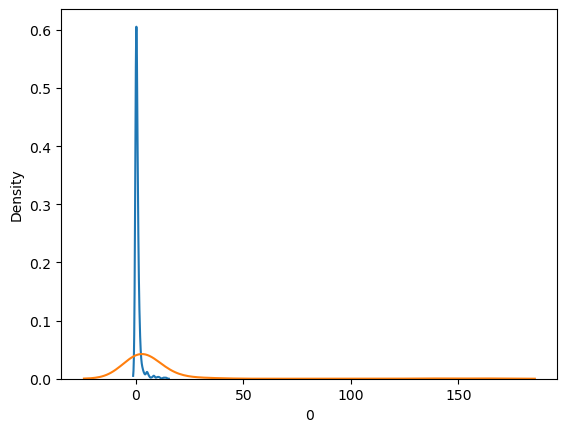

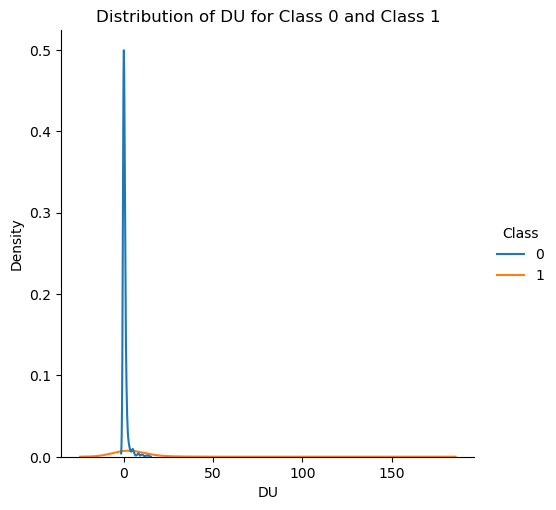

In [53]:
# Group the data by the "Class" column and calculate the distribution of the second top feature.
feature_distribution = train_df.groupby('Class')[second_top_feature_name].apply(lambda x: sns.kdeplot(x))

# Plot the distribution.
sns.displot(data = train_df, x = second_top_feature_name, hue = 'Class', kind = 'kde')
plt.title('Distribution of {} for Class 0 and Class 1'.format(second_top_feature_name))
plt.show()

In [54]:
train_df_T2 = train_df_T1.copy()

# Reduce the value of second_top_feature_name to class_median2[0] if it is more than class_median2[0].
train_df_T2[second_top_feature_name] = train_df_T2[second_top_feature_name].apply(lambda x: min(x, class_median2[0]))
print(train_df_T2[second_top_feature_name])
train_df_T2

0      0.158631
1      0.005518
2      0.158631
3      0.158631
4      0.158631
         ...   
612    0.005518
613    0.158631
614    0.005518
615    0.158631
616    0.005518
Name: DU, Length: 617, dtype: float64


,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FR,FS,GB,GE,GF,GH,GI,GL,Epsilon,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,737137.0,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,NaN,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,NaN,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,NaN,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,737509.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,...,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,737681.0,0
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,...,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,737676.0,0
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,...,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,737264.0,0
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,...,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622,737090.0,0


In [55]:
# X_T2 represents the feature data, and y represents the target variable data.
X_T2 = train_df_T2.iloc[:, 1:-1]
y = train_df_T2.iloc[:, -1]

# We can split the data into training and testing sets using the train_test_split function from scikit-learn.
from sklearn.model_selection import train_test_split

X_train_T2, X_test_T2, y_train, y_test = train_test_split(X_T2, y, test_size = 0.2, random_state = 42)

# Standardize the independent variables.
X_train_T2 = scaler.transform(X_train_T2)
X_test_T2 = scaler.transform(X_test_T2)

In [56]:
# probability of the disease
selected_probs = model.predict_proba(X_test)[:, 1][y_test == 1]
selected_probs

array([0.9890322 , 0.9522492 , 0.76040083, 0.9479036 , 0.804129  ,
       0.25214103, 0.23671035, 0.64574146, 0.01388482, 0.9990664 ,
       0.9637296 , 0.9854983 , 0.9065042 , 0.15588093, 0.52860343,
       0.9512857 , 0.8958291 , 0.9806491 , 0.9974631 , 0.7083695 ,
       0.21048228, 0.9158255 , 0.32509154], dtype=float32)

In [57]:
# probability of the disease after the treatment
selected_probs_T2 = model.predict_proba(X_test_T2)[:, 1][y_test == 1]
selected_probs_T2

array([8.4323823e-01, 9.2727774e-01, 9.3984866e-01, 2.7396424e-02,
       1.5864832e-02, 2.5214103e-01, 5.6843090e-01, 5.2902704e-01,
       1.3884818e-02, 9.5200735e-01, 4.1272879e-01, 9.6960080e-01,
       9.0650421e-01, 1.5588093e-01, 5.7566320e-03, 9.2597855e-03,
       1.8061427e-02, 9.8064911e-01, 9.9502784e-01, 1.8748823e-03,
       2.1048228e-01, 5.9191607e-02, 4.8763258e-04], dtype=float32)

In [58]:
selected_probs_before = selected_probs * 100
selected_probs_after2 = selected_probs_T2 * 100

data = {
    "Before Treatment": selected_probs_before,
    "After Treatment": selected_probs_after2
}

df_risk_of_disease = pd.DataFrame(data)
df_risk_of_disease.index.name = "Patient"
df_risk_of_disease.index = train_df.loc[y_test[y_test == 1].index, 'Id']
df_risk_of_disease.columns.name = "The Risk of Disease"

# Format values as percentages with two decimal places.
df_risk_of_disease = df_risk_of_disease.applymap("{:.1f}%".format)

df_risk_of_disease

The Risk of Disease,Before Treatment,After Treatment
Id,,
1360fac6a227,98.9%,84.3%
79b44ed25c29,95.2%,92.7%
2cddd2d70d72,76.0%,94.0%
687ebf4e5d7d,94.8%,2.7%
c5c8ffd0c908,80.4%,1.6%
34a025893d36,25.2%,25.2%
e76aa8f0f2e7,23.7%,56.8%
ba4443b0170c,64.6%,52.9%
3924089e4396,1.4%,1.4%


After the treatment of the top 2 features, we saw **significant improvement** in their disease risk **among some patients** of "Class1." However, **the risk for other patients did not improve or even got worse**.

# Treatment of the Top 3 Features

This time we will **treat the top 3 features, supposing they are treatable to the median value among healthy people in the training data by some intervention, respectively**. Then we look into **how the disease risk will change by using the same trained model**.

In [59]:
# Get the index of the third top feature.
third_top_index = importances.argsort()[-3]

# Get the name and importance of the third top feature.
third_top_feature_name = X.columns[third_top_index]
third_top_importance = importances[third_top_index]

# Print the importance and third top feature importance.
print('Importance:', third_top_feature_name)
print('Third Top Feature Importance:', third_top_importance)

Importance: BC
Third Top Feature Importance: 0.056507614


In [60]:
# Calculate the median value of the third top feature for each class.
class_median3 = train_df.groupby('Class')[third_top_feature_name].median()

# Print the median values.
print("Median value of {} for Class 0: {}".format(third_top_feature_name, class_median3[0]))
print("Median value of {} for Class 1: {}".format(third_top_feature_name, class_median3[1]))

Median value of BC for Class 0: 1.2299
Median value of BC for Class 1: 4.306407


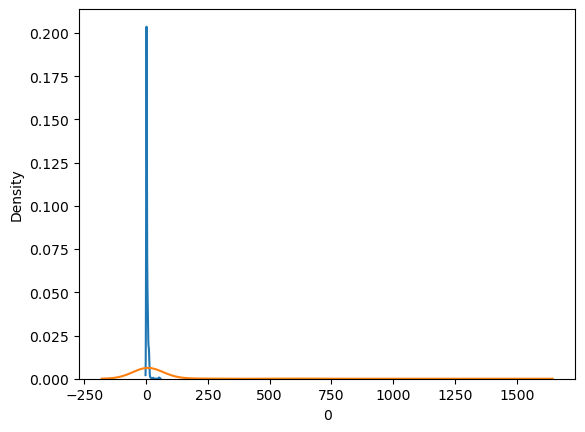

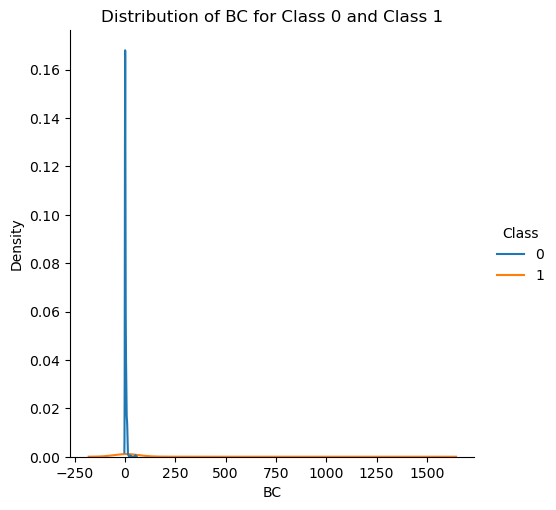

In [61]:
# Group the data by the "Class" column and calculate the distribution of the third top feature.
feature_distribution = train_df.groupby('Class')[third_top_feature_name].apply(lambda x: sns.kdeplot(x))

# Plot the distribution.
sns.displot(data = train_df, x = third_top_feature_name, hue = 'Class', kind = 'kde')
plt.title('Distribution of {} for Class 0 and Class 1'.format(third_top_feature_name))
plt.show()

In [62]:
train_df_T3 = train_df_T2.copy()

# Reduce the value of third_top_feature_name to class_median3[0] if it is more than class_median3[0].
train_df_T3[third_top_feature_name] = train_df_T2[third_top_feature_name].apply(lambda x: min(x, class_median3[0]))
print(train_df_T3[third_top_feature_name])
train_df_T3

0      1.2299
1      1.2299
2      1.2299
3      1.2299
4      1.2299
        ...  
612    1.2299
613    1.2299
614    1.2299
615    1.2299
616    1.2299
Name: BC, Length: 617, dtype: float64


,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FR,FS,GB,GE,GF,GH,GI,GL,Epsilon,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,1.2299,...,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,737137.0,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.2299,...,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,NaN,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.2299,...,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,NaN,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.2299,...,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,NaN,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,1.2299,...,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,737509.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,1.2299,...,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,737681.0,0
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,1.2299,...,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,737676.0,0
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.2299,...,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,737264.0,0
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.2299,...,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622,737090.0,0


In [63]:
# X_T3 represents the feature data, and y represents the target variable data.
X_T3 = train_df_T3.iloc[:, 1:-1]
y = train_df_T3.iloc[:, -1]

# We can split the data into training and testing sets using the train_test_split function from scikit-learn.
from sklearn.model_selection import train_test_split

X_train_T3, X_test_T3, y_train, y_test = train_test_split(X_T3, y, test_size = 0.2, random_state = 42)

# Standardize the independent variables.
X_train_T3 = scaler.transform(X_train_T3)
X_test_T3 = scaler.transform(X_test_T3)

In [64]:
# probability of the disease
selected_probs = model.predict_proba(X_test)[:, 1][y_test == 1]
selected_probs

array([0.9890322 , 0.9522492 , 0.76040083, 0.9479036 , 0.804129  ,
       0.25214103, 0.23671035, 0.64574146, 0.01388482, 0.9990664 ,
       0.9637296 , 0.9854983 , 0.9065042 , 0.15588093, 0.52860343,
       0.9512857 , 0.8958291 , 0.9806491 , 0.9974631 , 0.7083695 ,
       0.21048228, 0.9158255 , 0.32509154], dtype=float32)

In [65]:
# probability of the disease after the treatment
selected_probs_T3 = model.predict_proba(X_test_T3)[:, 1][y_test == 1]
selected_probs_T3

array([7.5734073e-01, 8.8092703e-01, 7.8962672e-01, 2.7396424e-02,
       1.4424622e-02, 2.5214103e-01, 4.1040936e-01, 5.2902704e-01,
       1.3884818e-02, 9.5200735e-01, 4.1272879e-01, 9.6960080e-01,
       7.6470166e-01, 1.4358455e-01, 3.1741988e-03, 9.2597855e-03,
       1.6425135e-02, 9.8064911e-01, 9.9146116e-01, 1.7024834e-03,
       5.8594473e-02, 4.9960427e-02, 4.4273731e-04], dtype=float32)

In [66]:
selected_probs_before = selected_probs * 100
selected_probs_after3 = selected_probs_T3 * 100

data = {
    "Before Treatment": selected_probs_before,
    "After Treatment": selected_probs_after3
}

df_risk_of_disease = pd.DataFrame(data)
df_risk_of_disease.index.name = "Patient"
df_risk_of_disease.index = train_df.loc[y_test[y_test == 1].index, 'Id']
df_risk_of_disease.columns.name = "The Risk of Disease"

# Format values as percentages with two decimal places.
df_risk_of_disease = df_risk_of_disease.applymap("{:.1f}%".format)

df_risk_of_disease

The Risk of Disease,Before Treatment,After Treatment
Id,,
1360fac6a227,98.9%,75.7%
79b44ed25c29,95.2%,88.1%
2cddd2d70d72,76.0%,79.0%
687ebf4e5d7d,94.8%,2.7%
c5c8ffd0c908,80.4%,1.4%
34a025893d36,25.2%,25.2%
e76aa8f0f2e7,23.7%,41.0%
ba4443b0170c,64.6%,52.9%
3924089e4396,1.4%,1.4%


# Biostatistics with R

To evaluate the efficacy of the treatment, biostatistics with R is greatly useful **by comparing between the 2-paired groups of Before Treatment and After Treatment**. Generally speaking, **p-value is set 0.05** and **t-test is used for a small number of samples**. I will show a sample R code and the results below.

**Please replace 'US dollar' with $.**

### # To create the data in R, you can use the following code.
data <- data.frame(
  
   'Before Treatment' = c(98.9, 95.2, 76.0, 94.8, 80.4, 25.2, 23.7, 64.6, 1.4, 99.9, 96.4, 98.5, 90.7, 15.6, 52.9, 95.1, 89.6, 98.1, 99.7, 70.8, 21.0, 91.6, 32.5),
  
   'After Treatment' = c(75.7, 88.1, 79.0, 2.7, 1.4, 25.2, 41.0, 52.9, 1.4, 95.2, 41.3, 97.0, 76.5, 14.4, 0.3, 0.9, 1.6, 98.1, 99.1, 0.2, 5.9, 5.0, 0.0)
  
)

### # Perform paired t-test.
result <- t.test(data'US dollar'Before.Treatment, data'US dollar'After.Treatment, paired = TRUE)

result

### # Check the p-value.
p_value <- result'US dollar'p.value

### # Compare p-value with the significance level (e.g., 0.05).
if (p_value < 0.05) {

   significance <- "Significant difference"
  
} else {

   significance <- "No significant difference"
  
}

### # Print the result.
cat("Paired t-test result:")

cat("\n")

cat("p-value:", p_value)

cat("\n")

cat("Conclusion:", significance)

cat("\n")

### Results

Paired t-test

data:  data'US dollar'Before.Treatment and data'US dollar'After.Treatment

t = 3.9892, df = 22, p-value = 0.0006193

alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:

 14.81494 46.89810

sample estimates:

mean of the differences 
               30.85652
               
p-value: 0.000619283

Conclusion: Significant difference

After the treatment of the top 3 features, we saw **significant improvement** in their disease risk **among some patients** of "Class1." However, **the risk for other patients did not improve or even got worse**.

# Treatment of the Top 4 Features

This time we will **treat the top 4 features, supposing they are treatable to the median value among healthy people in the training data by some intervention, respectively**. Then we look into **how the disease risk will change by using the same trained model**.

In [67]:
# Get the index of the fourth top feature.
fourth_top_index = importances.argsort()[-4]

# Get the name and importance of the fourth top feature.
fourth_top_feature_name = X.columns[fourth_top_index]
fourth_top_importance = importances[fourth_top_index]

# Print the importance and fourth top feature importance.
print('Importance:', fourth_top_feature_name)
print('Fourth Top Feature Importance:', fourth_top_importance)

Importance: EH
Fourth Top Feature Importance: 0.05205804


In [68]:
# Calculate the median value of the fourth top feature for each class.
class_median4 = train_df.groupby('Class')[fourth_top_feature_name].median()

# Print the median values.
print("Median value of {} for Class 0: {}".format(fourth_top_feature_name, class_median4[0]))
print("Median value of {} for Class 1: {}".format(fourth_top_feature_name, class_median4[1]))

Median value of EH for Class 0: 0.073008
Median value of EH for Class 1: 0.17643599999999998


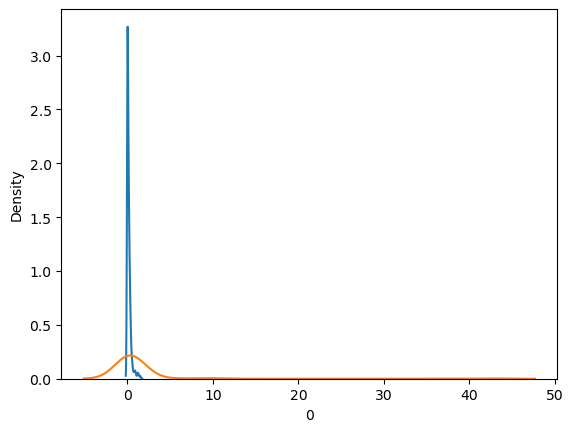

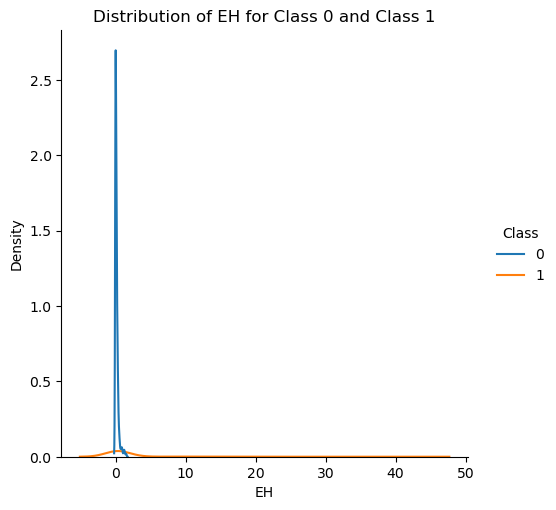

In [69]:
# Group the data by the "Class" column and calculate the distribution of the fourth top feature.
feature_distribution = train_df.groupby('Class')[fourth_top_feature_name].apply(lambda x: sns.kdeplot(x))

# Plot the distribution.
sns.displot(data = train_df, x = fourth_top_feature_name, hue = 'Class', kind = 'kde')
plt.title('Distribution of {} for Class 0 and Class 1'.format(fourth_top_feature_name))
plt.show()

In [70]:
train_df_T4 = train_df_T3.copy()

# Reduce the value of fourth_top_feature_name to class_median4[0] if it is more than class_median4[0].
train_df_T4[fourth_top_feature_name] = train_df_T4[fourth_top_feature_name].apply(lambda x: min(x, class_median4[0]))
print(train_df_T4[fourth_top_feature_name])
train_df_T4

0      0.073008
1      0.003042
2      0.073008
3      0.073008
4      0.073008
         ...   
612    0.003042
613    0.073008
614    0.003042
615    0.073008
616    0.003042
Name: EH, Length: 617, dtype: float64


,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FR,FS,GB,GE,GF,GH,GI,GL,Epsilon,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,1.2299,...,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,737137.0,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.2299,...,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,NaN,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.2299,...,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,NaN,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.2299,...,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,NaN,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,1.2299,...,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,737509.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,1.2299,...,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,737681.0,0
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,1.2299,...,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,737676.0,0
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.2299,...,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,737264.0,0
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.2299,...,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622,737090.0,0


In [71]:
# X_T4 represents the feature data, and y represents the target variable data.
X_T4 = train_df_T4.iloc[:, 1:-1]
y = train_df_T4.iloc[:, -1]

# We can split the data into training and testing sets using the train_test_split function from scikit-learn.
from sklearn.model_selection import train_test_split

X_train_T4, X_test_T4, y_train, y_test = train_test_split(X_T4, y, test_size = 0.2, random_state = 42)

# Standardize the independent variables.
X_train_T4 = scaler.transform(X_train_T4)
X_test_T4 = scaler.transform(X_test_T4)

In [72]:
# probability of the disease
selected_probs = model.predict_proba(X_test)[:, 1][y_test == 1]
selected_probs

array([0.9890322 , 0.9522492 , 0.76040083, 0.9479036 , 0.804129  ,
       0.25214103, 0.23671035, 0.64574146, 0.01388482, 0.9990664 ,
       0.9637296 , 0.9854983 , 0.9065042 , 0.15588093, 0.52860343,
       0.9512857 , 0.8958291 , 0.9806491 , 0.9974631 , 0.7083695 ,
       0.21048228, 0.9158255 , 0.32509154], dtype=float32)

In [73]:
# probability of the disease after the treatment
selected_probs_T4 = model.predict_proba(X_test_T4)[:, 1][y_test == 1]
selected_probs_T4

array([7.5734073e-01, 8.8092703e-01, 7.8962672e-01, 2.7396424e-02,
       1.4424622e-02, 2.5214103e-01, 4.1040936e-01, 5.2902704e-01,
       1.3884818e-02, 9.5200735e-01, 4.1272879e-01, 9.6960080e-01,
       7.6470166e-01, 1.4358455e-01, 3.1741988e-03, 9.2597855e-03,
       1.6425135e-02, 9.8064911e-01, 9.9146116e-01, 1.7024834e-03,
       5.8594473e-02, 4.9960427e-02, 4.4273731e-04], dtype=float32)

In [74]:
selected_probs_before = selected_probs * 100
selected_probs_after4 = selected_probs_T4 * 100

data = {
    "Before Treatment": selected_probs_before,
    "After Treatment": selected_probs_after4
}

df_risk_of_disease = pd.DataFrame(data)
df_risk_of_disease.index.name = "Patient"
df_risk_of_disease.index = train_df.loc[y_test[y_test == 1].index, 'Id']
df_risk_of_disease.columns.name = "The Risk of Disease"

# Format values as percentages with two decimal places.
df_risk_of_disease = df_risk_of_disease.applymap("{:.1f}%".format)

df_risk_of_disease

The Risk of Disease,Before Treatment,After Treatment
Id,,
1360fac6a227,98.9%,75.7%
79b44ed25c29,95.2%,88.1%
2cddd2d70d72,76.0%,79.0%
687ebf4e5d7d,94.8%,2.7%
c5c8ffd0c908,80.4%,1.4%
34a025893d36,25.2%,25.2%
e76aa8f0f2e7,23.7%,41.0%
ba4443b0170c,64.6%,52.9%
3924089e4396,1.4%,1.4%


After the treatment of the top 4 features, we saw **little improvement** in their disease risk among patients of "Class1" **as compared to that after the treatment of the top 3 features**.

# Summary of the Treatment Results

In [75]:
data = {
    "Before Treatment": selected_probs_before,
    "After 1 Treatment": selected_probs_after1,
    "After 2 Treatments": selected_probs_after2,
    "After 3 Treatments": selected_probs_after3,
    "After 4 Treatments": selected_probs_after4
}

df_risk_of_disease = pd.DataFrame(data)
df_risk_of_disease.index.name = "Patient"
df_risk_of_disease.index = train_df.loc[y_test[y_test == 1].index, 'Id']
df_risk_of_disease.columns.name = "The Risk of Disease"

# Format values as percentages with two decimal places.
df_risk_of_disease = df_risk_of_disease.applymap("{:.1f}%".format)

df_risk_of_disease

The Risk of Disease,Before Treatment,After 1 Treatment,After 2 Treatments,After 3 Treatments,After 4 Treatments
Id,,,,,
1360fac6a227,98.9%,98.9%,84.3%,75.7%,75.7%
79b44ed25c29,95.2%,91.0%,92.7%,88.1%,88.1%
2cddd2d70d72,76.0%,76.0%,94.0%,79.0%,79.0%
687ebf4e5d7d,94.8%,94.8%,2.7%,2.7%,2.7%
c5c8ffd0c908,80.4%,80.4%,1.6%,1.4%,1.4%
34a025893d36,25.2%,25.2%,25.2%,25.2%,25.2%
e76aa8f0f2e7,23.7%,23.7%,56.8%,41.0%,41.0%
ba4443b0170c,64.6%,52.9%,52.9%,52.9%,52.9%
3924089e4396,1.4%,1.4%,1.4%,1.4%,1.4%


In [76]:
print("The Average Risk of the Disease for Class 1 after {} Feature(s) Treatment: {}".format(0, np.mean(selected_probs_before)))
print("The Average Risk of the Disease for Class 1 after {} Feature(s) Treatment: {}".format(1, np.mean(selected_probs_after1)))
print("The Average Risk of the Disease for Class 1 after {} Feature(s) Treatment: {}".format(2, np.mean(selected_probs_after2)))
print("The Average Risk of the Disease for Class 1 after {} Feature(s) Treatment: {}".format(3, np.mean(selected_probs_after3)))
print("The Average Risk of the Disease for Class 1 after {} Feature(s) Treatment: {}".format(4, np.mean(selected_probs_after4)))

The Average Risk of the Disease for Class 1 after 0 Feature(s) Treatment: 70.1150894165039
The Average Risk of the Disease for Class 1 after 1 Feature(s) Treatment: 69.3763656616211
The Average Risk of the Disease for Class 1 after 2 Feature(s) Treatment: 42.58531951904297
The Average Risk of the Disease for Class 1 after 3 Feature(s) Treatment: 39.258567810058594
The Average Risk of the Disease for Class 1 after 4 Feature(s) Treatment: 39.258567810058594


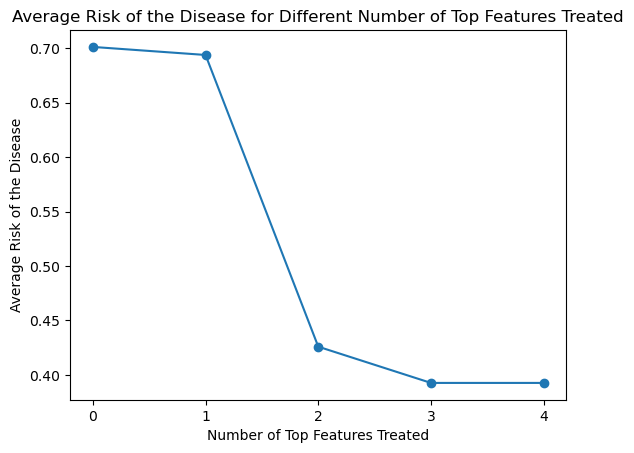

In [77]:
# Calculate the average risk of disease for each number of top features treated.
average_risk_before = np.mean(selected_probs)
average_risk_after1 = np.mean(selected_probs_T1)
average_risk_after2 = np.mean(selected_probs_T2)
average_risk_after3 = np.mean(selected_probs_T3)
average_risk_after4 = np.mean(selected_probs_T4)

# Define the x and y values for the graph.
x = [0, 1, 2, 3, 4]
y = [average_risk_before, average_risk_after1, average_risk_after2, average_risk_after3, average_risk_after4]

# Plot the graph.
plt.plot(x, y, marker = 'o')
plt.xlabel('Number of Top Features Treated')
plt.ylabel('Average Risk of the Disease')
plt.title('Average Risk of the Disease for Different Number of Top Features Treated')
plt.xticks(x)
plt.show()

# Use of Test Data for Prognosis and Treatment

**Let's try to use the test data for the same prediction. This AI should also be used for people who are not labelled.**

## Predict the Test Data

First, we have to **predict '"Class" of the test data in order to select people labelled "Class 1"** from the test data.

In [78]:
# Create the test dataset.
X_test = test_df.iloc[:, 1:]

# Standardize the independent variables.
X_test = scaler.transform(X_test)

# Predict the results.
y_pred = model.predict(X_test)

In [79]:
y_pred_df = pd.DataFrame(y_pred, columns = ['Class'])
y_pred_df

,Class
0,0
1,0
2,0
3,0
4,0


In [80]:
test_df['Class'] = y_pred_df
test_df

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FR,FS,GB,GE,GF,GH,GI,GL,Epsilon,Class
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737698.0,0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737698.0,0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737698.0,0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737698.0,0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737698.0,0


**Unfortunately, there is no subject of "Class 1" in the opened test data. Thus, we have no choice but to use the subjects of "Class 0." But you will know how to use this AI to prevent the disease as a public health strategy.**

In [81]:
# Select people labelled "Class 1" from the test data.
#test_df = test_df[test_df['Class'] == 1]
#test_df

## Treatment of the Top Feature

In [82]:
test_df_T1 = test_df.copy()

# Reduce the value of top_feature_name to class_median1[0] if it is more than class_median1[0].
test_df_T1[top_feature_name] = test_df_T1[top_feature_name].apply(lambda x: min(x, class_median1[0]))
print(test_df_T1[top_feature_name])
test_df_T1

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: FE, dtype: float64


,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FR,FS,GB,GE,GF,GH,GI,GL,Epsilon,Class
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737698.0,0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737698.0,0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737698.0,0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737698.0,0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737698.0,0


In [83]:
# X_T1 represents the feature data.
X_T1 = test_df_T1.iloc[:, 1:-1]

# Standardize the independent variables.
X_T1 = scaler.transform(X_T1)

In [84]:
# probability of the disease
selected_probs = model.predict_proba(X_test)[:, 1]
selected_probs

array([0.12205915, 0.12205915, 0.12205915, 0.12205915, 0.12205915],
      dtype=float32)

In [85]:
# probability of the disease after the treatment
selected_probs_T1 = model.predict_proba(X_T1)[:, 1]
selected_probs_T1

array([0.12205915, 0.12205915, 0.12205915, 0.12205915, 0.12205915],
      dtype=float32)

In [86]:
selected_probs_before = selected_probs * 100
selected_probs_after1 = selected_probs_T1 * 100

data = {
    "Before Treatment": selected_probs_before,
    "After Treatment": selected_probs_after1
}

df_risk_of_disease = pd.DataFrame(data)
df_risk_of_disease.index.name = "Patient"
df_risk_of_disease.index = test_df.Id
df_risk_of_disease.columns.name = "The Risk of Disease"

# Format values as percentages with two decimal places.
df_risk_of_disease = df_risk_of_disease.applymap("{:.1f}%".format)

df_risk_of_disease

The Risk of Disease,Before Treatment,After Treatment
Id,,
00eed32682bb,12.2%,12.2%
010ebe33f668,12.2%,12.2%
02fa521e1838,12.2%,12.2%
040e15f562a2,12.2%,12.2%
046e85c7cc7f,12.2%,12.2%


**Since they are all subjects of "Class 0," this treatment has no effect on any subject. But you know how to use this AI to prevent the disease as a public health strategy.**

# Conclusion

Generally, **features selection did not change the accuracy to predict the risk of the disease**. Thus, **some features can be removed from the medical prognosis test, if the comprehensive examination is expensive** and is not easily available to everyone.

In addition, **selection of the top 3 features appeared to be effective for the prevention of the disease**. The risk of the disease was significantly reduced among the people who were categorized into "Class 1" **by reducing the top 3 features to the medium value observed in the people of "Class 0," respectively**. On the other hand, the treatment of the 4th feature did not provide further improvement of the risk. Thus, the treatment of the top 3 features appeared to be the most effective to prevent the disease.

However, there are some limitations. First, **the risk was significantly reduced only among some people** out of the target subjects. **Other people underwent little improvement or even worsened risk.** Therefore, it is indispensable to find for what kind of people this treatment approach is particularly effective. Second, these features are not identified here. Thus, **it is not known whether each feature can be improved at all**. Here, the experiment was conducted on the supposition that each feature can be improved to the extent of the medium value observed in the people of "Class 0" by lifestyle or medical treatment. 

I am a medical doctor working on **artificial intelligence (AI) for medicine**. At present AI is also widely used in the medical field. Particularly, AI performs in the healthcare sector following tasks: **image classification, object detection, semantic segmentation, GANs, text classification, etc**. **If you are interested in AI for medicine, please see my other notebooks.**